 # K means Clusturing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# I have used customer shopping dataset
df = pd.read_csv("C:\\Users\\Hp\\Downloads\\K means clusturing\\Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
X = df.iloc[:, [3, 4]].values  # Considering 'Annual Income' and 'Spending Score' for clustering

In [7]:
# Initializing a list to store the Within-Cluster-Sum-of-Squares (WCSS) for different number of clusters
# Creating a KMeans model with 'i' clusters, using k-means++ initialization method, and fixing of the random state for reproducibility
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Printing of the lengths of range(1, 11) and wcss to debug
print(len(range(1, 11)))
print(len(wcss))

10
10


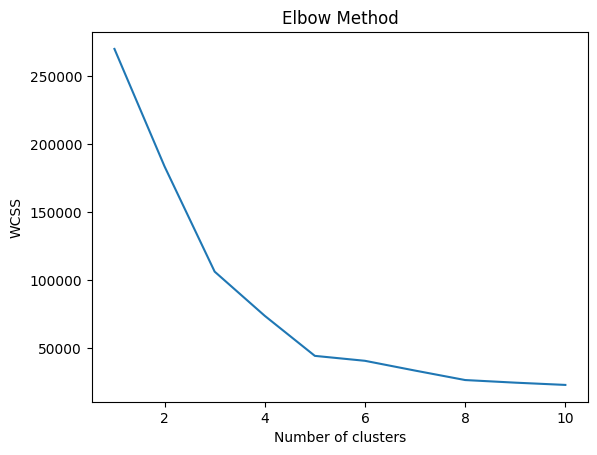

In [8]:
# Plotting the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [11]:
# Selecting the features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initializing the KMeans with the number of clusters which i have tken is 5
kmeans = KMeans(n_clusters=5, random_state=42)

# applying  Fit KMeans to the data
kmeans.fit(X)

# Getting the cluster labels for each data point
labels = kmeans.labels_

# Adding the cluster labels to the original DataFrame
df['Cluster'] = labels

# Printing of the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Printing the count of data points in each cluster
print("Count of data points in each cluster:")
print(df['Cluster'].value_counts())

Cluster Centers:
[[ 46.21348315  47.71910112  41.79775281]
 [ 32.45454545 108.18181818  82.72727273]
 [ 24.68965517  29.5862069   73.65517241]
 [ 40.39473684  87.          18.63157895]
 [ 31.78787879  76.09090909  77.75757576]]
Count of data points in each cluster:
Cluster
0    89
3    38
4    33
2    29
1    11
Name: count, dtype: int64
